### Mini Project Part 2 Solution - Supervised Learning with PCA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('Concrete_Data.csv')
print(data.columns)

# Rename columns for ease of coding
column_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength']

data.columns = column_names
print(data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age_days',
       'Concrete compressive strength_Mpa'],
      dtype='object')
Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete Compressive Strength'],
      dtype='object')


In [3]:
# Split the data into features and target
X = data.drop('Concrete Compressive Strength', axis=1)
y = data['Concrete Compressive Strength']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)


(1030, 8)


In [4]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train a Linear Regression model on the original dataset
model_orig = LinearRegression()
model_orig.fit(X_train_scaled, y_train)

# Evaluate its RMSE on both the training and test set
print(f"Original Model - Train RMSE: {np.sqrt(mean_squared_error(y_train, model_orig.predict(X_train_scaled)))}")
print(f"Original Model - Test RMSE: {np.sqrt(mean_squared_error(y_test, model_orig.predict(X_test_scaled)))}")



Original Model - Train RMSE: 10.518787334819802
Original Model - Test RMSE: 9.79647590162436


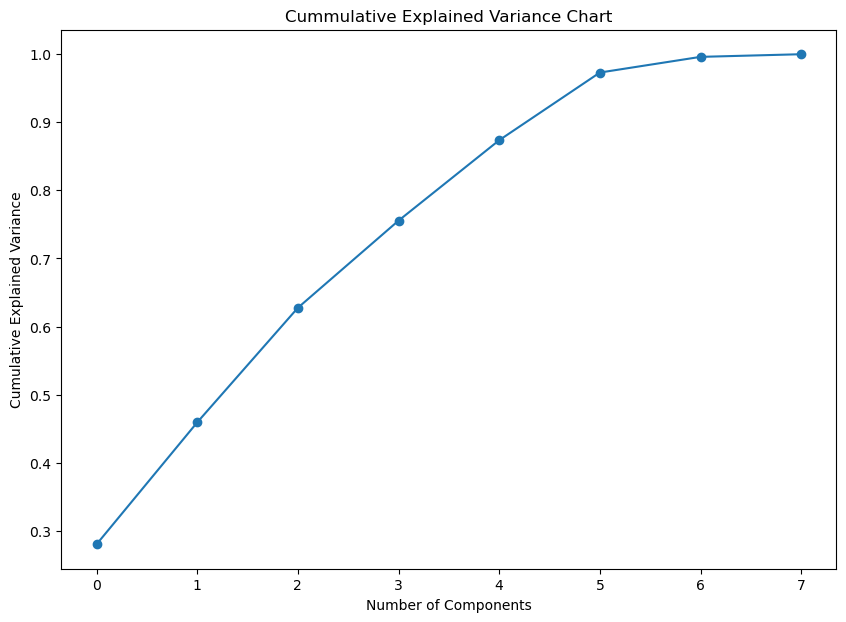

In [6]:
# Fit PCA on the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cummulative Explained Variance Chart')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



In [7]:
# Determine the number of components to explain at least 90% variance
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0] + 1
print(f"Number of components for 90% variance: {n_components}")

pca_reduced = PCA(n_components)

# Apply PCA transformation to the train and test set
X_train_pca = pca_reduced.fit_transform(X_train_scaled)
X_test_pca = pca_reduced.transform(X_test_scaled)

# Train a new Linear Regression model on the PCA-transformed dataset
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Evaluate its RMSE on both the training and test set
print(f"PCA Model - Train RMSE: {np.sqrt(mean_squared_error(y_train, model_pca.predict(X_train_pca)))}")
print(f"PCA Model - Test RMSE: {np.sqrt(mean_squared_error(y_test, model_pca.predict(X_test_pca)))}")

Number of components for 90% variance: 6
PCA Model - Train RMSE: 11.168046148274074
PCA Model - Test RMSE: 10.551501117180658


In [8]:
# Variation between the errors

print(f"Without and with PCA % variation in RMSE: {(1 - np.sqrt(mean_squared_error(y_train, model_pca.predict(X_train_pca)))/np.sqrt(mean_squared_error(y_train, model_orig.predict(X_train_scaled))))*100:.2f}%")

Without and with PCA % variation in RMSE: -6.17%
